### Maxwell A. Fine
### June 2024

This Notebook is for for running `rfifind_stats.py` from `presto` over observations already taken and processed. 

This will make a lot of `.weight` files which we can then use to make a main list of bad freq channels in our data


In [9]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
# we will be running presto in a docker image, so we will execute presto commands using subprocess
import subprocess 
import os

# Define the container name and docker image
container_name = "noise_new_channels_v2"
docker_image = "c7897abba927"
local_path = "/home/afinemax/afinemax/khazad-dum/research/astron_2024/noise_channels/data/"
container_path = "/data"

# local data path
# / data

In [12]:
ls

copy_mask_files.sh*  data/  data2/  files_to_copy.txt  noise_channels.ipynb


In [13]:
cd data

/home/afinemax/afinemax/khazad-dum/research/astron_2024/noise_channels/data


### Here we check if our docker image is running, and start the image with x11 forwarding and attach our storage

### We also define a way to execute cmd lines inside the docker image

In [37]:
# Check if the container already exists
def container_exists(name):
    result = subprocess.run(["docker", "ps", "-a", "--filter", f"name={name}", "--format", "{{.Names}}"], capture_output=True, text=True)
    return name in result.stdout

# Start the container if it exists, otherwise run a new one
if container_exists(container_name):
    subprocess.run(["docker", "start", container_name])
else:
    subprocess.run([
        "docker", "run", "-d", "--name", container_name,
        "-v", f"{local_path}:{container_path}",
        "-e", f"DISPLAY={os.environ['DISPLAY']}",
        "-v", "/tmp/.X11-unix:/tmp/.X11-unix",
        docker_image, "sleep", "infinity"
    ])


def run_command_in_container(command):
    '''Runs command in the docker image cmd line, cmd is a single str'''
    result = subprocess.run(["docker", "exec", container_name, "bash", "-c", command], capture_output=True, text=True)
    return result.stdout, result.stderr

# Example commands to run inside the container
stdout, stderr = run_command_in_container("ls /data")
print("Standard Output:\n", stdout)
print("Standard Error:\n", stderr)

stdout, stderr = run_command_in_container("echo Hello from inside the container!")
print("Standard Output:\n", stdout)
print("Standard Error:\n", stderr)


noise_new_channels_v2
Standard Output:
 FRB20240114A_L1_Band_2024_03_24_10_40_52_DM518.00.dat
FRB20240114A_L1_Band_2024_03_24_10_40_52_DM518.00.inf
FRB20240114A_L1_Band_2024_03_24_10_40_52_DM518.00.singlepulse
FRB20240114A_L1_Band_2024_03_24_10_40_52_DM519.00.dat
FRB20240114A_L1_Band_2024_03_24_10_40_52_DM519.00.inf
FRB20240114A_L1_Band_2024_03_24_10_40_52_DM519.00.singlepulse
FRB20240114A_L1_Band_2024_03_24_10_40_52_DM520.00.dat
FRB20240114A_L1_Band_2024_03_24_10_40_52_DM520.00.inf
FRB20240114A_L1_Band_2024_03_24_10_40_52_DM520.00.singlepulse
FRB20240114A_L1_Band_2024_03_24_10_40_52_DM521.00.dat
FRB20240114A_L1_Band_2024_03_24_10_40_52_DM521.00.inf
FRB20240114A_L1_Band_2024_03_24_10_40_52_DM521.00.singlepulse
FRB20240114A_L1_Band_2024_03_24_10_40_52_DM522.00.dat
FRB20240114A_L1_Band_2024_03_24_10_40_52_DM522.00.inf
FRB20240114A_L1_Band_2024_03_24_10_40_52_DM522.00.singlepulse
FRB20240114A_L1_Band_2024_03_24_10_40_52_DM523.00.dat
FRB20240114A_L1_Band_2024_03_24_10_40_52_DM523.00.inf
FR

### Now we find out where we are in the image
### this should be /software

### Next we move our cwd to the location of the *.mask files

In [39]:
cmd = 'cd /data ls'

stdout, stderr = run_command_in_container(cmd)
print("Standard Output:\n", stdout)
print("Standard Error:\n", stderr)


Standard Output:
 
Standard Error:
 bash: line 1: cd: too many arguments



In [40]:


# running rfifind_stats.py on a specific mask file in the /data directory
command = "rfifind_stats.py /data/FRB20240114A_L1_Band_2024_03_24_10_40_52_rfifind.mask"
stdout, stderr = run_command_in_container(command)
print("Standard Output:\n", stdout)
print("Standard Error:\n", stderr)

Standard Output:
 Recommending to zap 31 channels:
  3 channels from Fourier power levels > 200.0
  3 channels from avgs levels being off by > 2.0 sigma
  1 channels from stds levels being off by > 2.0 sigma
  6 channels for being within 0.01 of the band edge
  0 channels were specified by the user
  29 channels for having no variation
  The mask recommends 30 additional bad channels
  adding them to the zap_chans list.

Standard Error:
 
WARNING!:  If raw data have channels in decreasing freq
           order, the channel ordering as given will be
           inverted!  Use 'invertband=True' in 
           write_weights() in that case!
No protocol specified

PGPLOT /xw: cannot connect to X server [:0]
Traceback (most recent call last):
  File "/software/presto5/installation/bin/rfifind_stats.py", line 37, in <module>
    a.set_zap_chans(power=args.fpower,
  File "/usr/local/lib/python3.12/dist-packages/presto/rfifind.py", line 216, in set_zap_chans
    if plot: self.plot_zapped_bandpas

Standard Output:
 /data/FRB20240114A_L1_Band_2024_03_24_10_40_52_rfifind.mask
/data/FRB20240114A_L1_Band_2024_03_24_10_51_04_rfifind.mask
/data/FRB20240114A_L1_Band_2024_03_24_11_01_05_rfifind.mask
/data/FRB20240114A_L1_Band_2024_03_24_11_11_06_rfifind.mask
/data/FRB20240114A_L1_Band_2024_03_24_11_20_00_rfifind.mask
/data/FRB20240114A_L1_Band_2024_03_24_11_24_34_rfifind.mask
/data/FRB20240114A_L1_Band_2024_03_24_11_32_25_rfifind.mask
/data/FRB20240114A_L1_Band_2024_03_24_11_42_37_rfifind.mask
/data/FRB20240114A_L1_Band_2024_03_24_11_52_38_rfifind.mask
/data/FRB20240114A_L2_Band_2024_03_24_10_40_52_rfifind.mask
/data/FRB20240114A_L2_Band_2024_03_24_10_51_04_rfifind.mask
/data/FRB20240114A_L2_Band_2024_03_24_11_01_05_rfifind.mask
/data/FRB20240114A_L2_Band_2024_03_24_11_11_06_rfifind.mask
/data/FRB20240114A_L2_Band_2024_03_24_11_21_07_rfifind.mask
/data/FRB20240114A_L2_Band_2024_03_24_11_24_34_rfifind.mask
/data/FRB20240114A_L2_Band_2024_03_24_11_31_54_rfifind.mask
/data/FRB20240114A_L2_

# run rfifind_stats.py on all the *.msak files

In [26]:
# ls all the *.mask files
command = "ls /data/*.mask"
stdout, stderr = run_command_in_container(command)
mask_files = stdout.split('\n')


In [28]:
mask_files

['/data/FRB20240114A_L1_Band_2024_03_24_10_40_52_rfifind.mask',
 '/data/FRB20240114A_L1_Band_2024_03_24_10_51_04_rfifind.mask',
 '/data/FRB20240114A_L1_Band_2024_03_24_11_01_05_rfifind.mask',
 '/data/FRB20240114A_L1_Band_2024_03_24_11_11_06_rfifind.mask',
 '/data/FRB20240114A_L1_Band_2024_03_24_11_20_00_rfifind.mask',
 '/data/FRB20240114A_L1_Band_2024_03_24_11_24_34_rfifind.mask',
 '/data/FRB20240114A_L1_Band_2024_03_24_11_32_25_rfifind.mask',
 '/data/FRB20240114A_L1_Band_2024_03_24_11_42_37_rfifind.mask',
 '/data/FRB20240114A_L1_Band_2024_03_24_11_52_38_rfifind.mask',
 '/data/FRB20240114A_L2_Band_2024_03_24_10_40_52_rfifind.mask',
 '/data/FRB20240114A_L2_Band_2024_03_24_10_51_04_rfifind.mask',
 '/data/FRB20240114A_L2_Band_2024_03_24_11_01_05_rfifind.mask',
 '/data/FRB20240114A_L2_Band_2024_03_24_11_11_06_rfifind.mask',
 '/data/FRB20240114A_L2_Band_2024_03_24_11_21_07_rfifind.mask',
 '/data/FRB20240114A_L2_Band_2024_03_24_11_24_34_rfifind.mask',
 '/data/FRB20240114A_L2_Band_2024_03_24_

In [29]:
for mask in mask_files:
    print('Running rfifind_stats.py on ', mask)
    command = "rfifind_stats.py " + mask
    stdout, stderr = run_command_in_container(command)
    print("Standard Output:\n", stdout)
    print("Standard Error:\n", stderr)


 running rfifind_stats.py on  /data/FRB20240114A_L1_Band_2024_03_24_10_40_52_rfifind.mask
Standard Output:
 Recommending to zap 31 channels:
  3 channels from Fourier power levels > 200.0
  3 channels from avgs levels being off by > 2.0 sigma
  1 channels from stds levels being off by > 2.0 sigma
  6 channels for being within 0.01 of the band edge
  0 channels were specified by the user
  29 channels for having no variation
  The mask recommends 30 additional bad channels
  adding them to the zap_chans list.

Standard Error:
 
WARNING!:  If raw data have channels in decreasing freq
           order, the channel ordering as given will be
           inverted!  Use 'invertband=True' in 
           write_weights() in that case!
No protocol specified

PGPLOT /xw: cannot connect to X server [:0]
Traceback (most recent call last):
  File "/software/presto5/installation/bin/rfifind_stats.py", line 37, in <module>
    a.set_zap_chans(power=args.fpower,
  File "/usr/local/lib/python3.12/dist-pac

#### Now we are done with docker and can look at the weight files we made

In [30]:
ls *.weights

FRB20240114A_L1_Band_2024_03_24_10_40_52_rfifind.weights
FRB20240114A_L1_Band_2024_03_24_10_51_04_rfifind.weights
FRB20240114A_L1_Band_2024_03_24_11_01_05_rfifind.weights
FRB20240114A_L1_Band_2024_03_24_11_11_06_rfifind.weights
FRB20240114A_L1_Band_2024_03_24_11_20_00_rfifind.weights
FRB20240114A_L1_Band_2024_03_24_11_24_34_rfifind.weights
FRB20240114A_L1_Band_2024_03_24_11_32_25_rfifind.weights
FRB20240114A_L1_Band_2024_03_24_11_42_37_rfifind.weights
FRB20240114A_L1_Band_2024_03_24_11_52_38_rfifind.weights
FRB20240114A_L2_Band_2024_03_24_10_40_52_rfifind.weights
FRB20240114A_L2_Band_2024_03_24_10_51_04_rfifind.weights
FRB20240114A_L2_Band_2024_03_24_11_01_05_rfifind.weights
FRB20240114A_L2_Band_2024_03_24_11_11_06_rfifind.weights
FRB20240114A_L2_Band_2024_03_24_11_21_07_rfifind.weights
FRB20240114A_L2_Band_2024_03_24_11_24_34_rfifind.weights
FRB20240114A_L2_Band_2024_03_24_11_31_54_rfifind.weights
FRB20240114A_L2_Band_2024_03_24_11_32_25_rfifind.weights
FRB20240114A_L2_Band_2024_03_24

### Now time for statistics

In [31]:
FRB20201124A_P_Band_2024_01_13_15cwd = os.getcwd()

# Define the pattern to search for
pattern = '*.weights'

# Use glob to find files matching the pattern in the current directory
weight_files = glob.glob(os.path.join(cwd, pattern))


In [32]:


# the L-band data has 320, the P-band data has 160. Makes a bit of sense, because L-band is 100MHz per file, P-band is 20MHz per file.

# init total files looked at
l_files =0
p_files = 0

# for P-band
try:
    masked_channels_p = None #Pband
    masked_channels_l = None #Lband
    for file in weight_files:
        # load the weight file
        w_data = np.loadtxt(file)

        n_channels = np.shape(w_data[:,0])


        # for P band
        if n_channels == (160,):

            # init master masked_chann array
            if masked_channels_p is None:
                masked_channels_p = np.zeros(shape=np.shape(w_data))

            masked_chan_i = np.asarray([w_data[:, 1] == 0], dtype=float) # 1 if masked, 0 if not masked 
            print('data has n_channels', n_channels)

            masked_channels_p[:,1] += masked_chan_i[0,:]
            p_files +=1


        # for L band 
        if n_channels == (320,):

            # init master masked_chann array
            if masked_channels_l is None:
                masked_channels_l = np.zeros(shape=np.shape(w_data))

            masked_chan_i = np.asarray([w_data[:, 1] == 0], dtype=float) # 1 if masked, 0 if not masked 
            print('data has n_channels', n_channels)

            masked_channels_l[:,1] += masked_chan_i[0,:]
            l_files +=1

except Exception as e:
    print(f"An error occurred: {e}")


data has n_channels (320,)
data has n_channels (320,)
data has n_channels (320,)
data has n_channels (160,)
data has n_channels (320,)
data has n_channels (320,)
data has n_channels (160,)
data has n_channels (160,)
data has n_channels (320,)
data has n_channels (160,)
data has n_channels (160,)
data has n_channels (160,)
data has n_channels (160,)
data has n_channels (320,)
data has n_channels (320,)
data has n_channels (320,)
data has n_channels (320,)
data has n_channels (160,)
data has n_channels (160,)
data has n_channels (320,)
data has n_channels (320,)
data has n_channels (320,)
data has n_channels (160,)
data has n_channels (160,)
data has n_channels (320,)
data has n_channels (160,)
data has n_channels (160,)
data has n_channels (160,)
data has n_channels (320,)
data has n_channels (160,)
data has n_channels (160,)
data has n_channels (320,)
data has n_channels (160,)
data has n_channels (160,)
data has n_channels (320,)
data has n_channels (320,)
data has n_channels (160,)
d

/tmp/ipykernel_19832/365556598.py:13: UserWarning: loadtxt: input contained no data: "/home/afinemax/afinemax/khazad-dum/research/astron_2024/noise_channels/data/FRB20240114A_L2_Band_2024_03_24_11_31_54_rfifind.weights"
  w_data = np.loadtxt(file)


### make plots

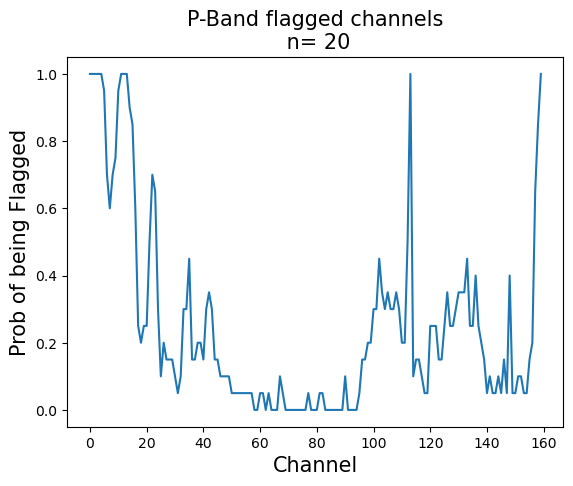

In [33]:
x_axis = np.arange(len(masked_channels_p))
plt.plot(x_axis, masked_channels_p[:,1]/p_files)

plt.title('P-Band flagged channels\n n= '+ str(p_files), fontsize=15)
plt.xlabel('Channel', fontsize=15)
plt.ylabel('Prob of being Flagged', size=15)
plt.savefig('p_band_bad_channels.png', dpi=100, bbox_inches='tight')

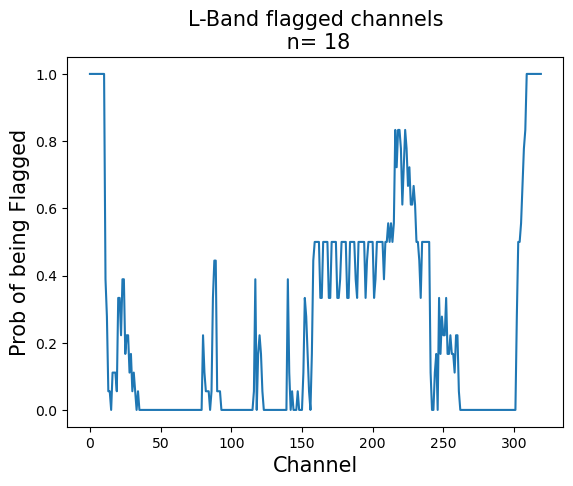

In [34]:
x_axis = np.arange(len(masked_channels_l))
plt.plot(x_axis, masked_channels_l[:,1]/l_files)

plt.title('L-Band flagged channels\n n= '+ str(l_files), fontsize=15)
plt.xlabel('Channel', fontsize=15)
plt.ylabel('Prob of being Flagged', size=15)
plt.savefig('L_band_bad_channels.png', dpi=100, bbox_inches='tight')